# lets first define the fundamental constants and initial stuff I will be using in the problem and also import the needed libraries

In [8]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

m1=1.5 #pulsar mass in solar masses
m2=0.709036 #Companion mass in solar masses
light_second = sp.constants.speed_of_light
solar_mass = 1.988416e30
grav = sp.constants.gravitational_constant *(1/np.pow(light_second,3))*solar_mass*np.pow(86400,2)
semi_major_axis = 13.868587422 / 0.920678
reduced_mass = m1*m2 / (m1+m2) 
eccentricity = 0.1344954160
ang_mom = m1*semi_major_axis*(m1+m2)*(1-eccentricity*eccentricity) / (m2*eccentricity)
dark_matter_density = 0.000009
#dark_matter_density = 0.0000

print("reduced mass: ", reduced_mass)
print("ang_mom:", ang_mom)
print("grav:", grav)

reduced mass:  0.48145616458944074
ang_mom: 513.942892501871
grav: 36768.70624421921


# This is just to convert my result to cartesian coordinates

In [50]:
#convert back to x and y
def convert(r, theta, m1, m2):
    points = len(r)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(0,points):
        temp = -m2/(m1+m2)*r[i]*np.cos(theta[i])
        x1.append(temp)

        temp = -m2/(m1+m2)*r[i]*np.sin(theta[i])
        y1.append(temp)

        temp = m1/(m1+m2)*r[i]*np.cos(theta[i])
        x2.append(temp)

        temp = m1/(m1+m2)*r[i]*np.sin(theta[i])
        y2.append(temp)
    
    return x1,y1,x2,y2

# Was code for the orbit with no dark matter, having calculated the angular momentum for the system

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.010e-05 ...  9.999e+00  1.000e+01]
        y: [[ 0.000e+00 -1.000e-03 ... -2.770e+01 -2.775e+01]
            [ 5.324e+01  5.324e+01 ...  4.644e+01  4.642e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 60014
     njev: 0
      nlu: 0
[53.24290162 53.24290161 53.2429004  ... 46.47096374 46.44329969
 46.42170733]


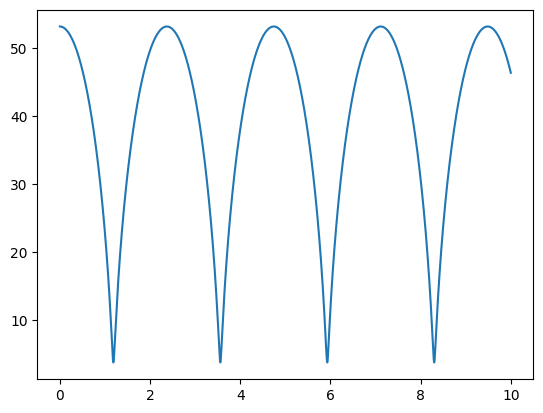

In [ ]:
#Define the differential equation for the no dark matter case
def perfect_ellipse(t,y,L0,reduced_mass,G,m1,m2):
    v, r = y

    return [
        (   np.pow(L0,2) / (  np.pow(reduced_mass,2) * np.pow(r,3)  )   ) - 2*G*m1*m2/(reduced_mass * np.pow(r,2)), #v-dot = stuff
        v #r-dot = v
    ]


#My initial conditions are at the apoaxis since that is easier to get the initial conditions at
initial_r_dot = 0
initial_r = semi_major_axis*(1+eccentricity)*(m2+m1)/m2
y0 = [initial_r_dot, initial_r]

#Telling scipy to solve the differential equations for me
pure_ellipse_sol = solve_ivp(perfect_ellipse,[0,10],y0,method='RK45',max_step=0.001,args=(ang_mom,reduced_mass,grav,m1,m2))
print(pure_ellipse_sol)

#obtain the values of the solve differential equation
t_vals = pure_ellipse_sol.t
pure_ellipse_motion = pure_ellipse_sol.y[1]


print(pure_ellipse_motion)
plt.plot(t_vals, pure_ellipse_motion)


# Code for the binary with no dark matter having theta and r solved for symultaneously

In [54]:
#Define the differential equation for the no dark matter case
def perfect_ellipse_with_theta(t,y,reduced_mass,G,m1,m2):
    v, r, omega, theta = y

    return [
        r*np.pow(omega,2)  -  2*G*m1*m2/(reduced_mass*np.pow(r,2))   , #v-dot = stuff
        v, #r-dot = v
        -2*v*theta/r, #omega-dot = stuff
        omega #theta-dot = omega
    ]


#My initial conditions are at the apoaxis since that is easier to get the initial conditions at
initial_r_dot = 0
initial_r = semi_major_axis*(1+eccentricity)*(m2+m1)/m2
#initial_theta_dot = (1-eccentricity) / (semi_major_axis*eccentricity*(1+eccentricity))
initial_theta_dot = 0.95
initial_theta = 0
y0_new = [initial_r_dot, initial_r, initial_theta_dot, initial_theta]

#Telling scipy to solve the differential equations for me
pure_ellipse_sol_with_theta = solve_ivp(perfect_ellipse_with_theta,[0,100],y0_new,method='RK45',max_step=0.0001,args=(reduced_mass,grav,m1,m2))


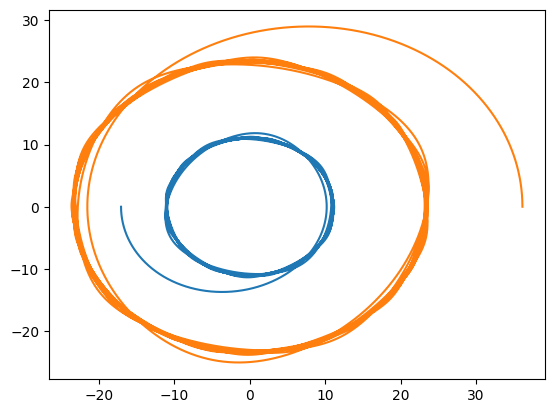

In [55]:
#obtain the values of the solve differential equation
t_vals = pure_ellipse_sol_with_theta.t
r_vals = pure_ellipse_sol_with_theta.y[1]
theta_vals = pure_ellipse_sol_with_theta.y[3]

x1,y1,x2,y2 = convert(r_vals,theta_vals,m1,m2)


plt.plot(x1, y1)
plt.plot(x2,y2)

# Lets now add dark matter into the orbit and see what we get

In [99]:
#Define the differential equation for the no dark matter case
def perfect_ellipse_with_dark_matter(t,y,reduced_mass,dark_matter_denity,G,m1,m2):
    v, r, omega, theta = y

    return [
        r*np.pow(omega,2)  -  2*G*m1*m2/(reduced_mass*np.pow(r,2))  + 8*np.pi*G*dark_matter_denity*r/3, #v-dot = stuff
        v, #r-dot = v
        -2*v*theta/r, #omega-dot = stuff
        omega #theta-dot = omega
    ]


#My initial conditions are at the apoaxis since that is easier to get the initial conditions at
initial_r_dot = 0
initial_r = semi_major_axis*(1+eccentricity)*(m2+m1)/m2
#initial_theta_dot = (1-eccentricity) / (semi_major_axis*eccentricity*(1+eccentricity))
initial_theta_dot = 0.95
initial_theta = 0
y0_new = [initial_r_dot, initial_r, initial_theta_dot, initial_theta]

#Telling scipy to solve the differential equations for me
pure_ellipse_sol_with_theta = solve_ivp(perfect_ellipse_with_dark_matter,[0,10],y0_new,method='RK45',max_step=0.0001,args=(reduced_mass,dark_matter_density,grav,m1,m2))


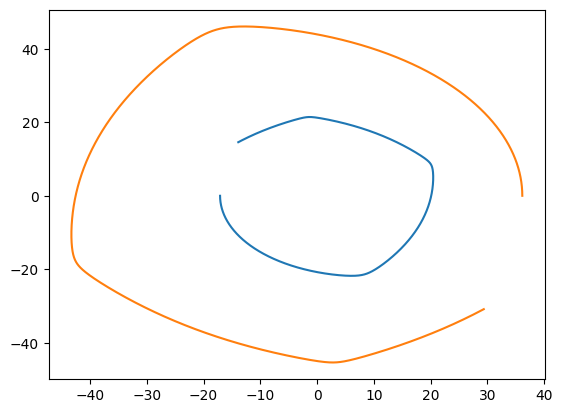

In [100]:
#obtain the values of the solve differential equation
t_vals = pure_ellipse_sol_with_theta.t
r_vals = pure_ellipse_sol_with_theta.y[1]
theta_vals = pure_ellipse_sol_with_theta.y[3]

x1,y1,x2,y2 = convert(r_vals,theta_vals,m1,m2)


plt.plot(x1, y1)
plt.plot(x2,y2)

In [ ]:
def temp_map(t,z,a,b,c,d):
    x,y = z
    return [
        a*x - b*x*y,
        -c*y+d*x*y
    ]
sol = solve_ivp(temp_map,[0,15],[10,5],args=(100.5,1,3,1),dense_output=True)

t= np.linspace(0,15,1000)
my_sol = sol.sol(t)
print(my_sol)
#plt.plot(t, my_sol.T)

[[1.00000000e+01 4.15852177e+01 1.57794988e+02 ... 1.73992495e-07
  2.46907679e-07 3.66153799e-07]
 [5.00000000e+00 6.67030390e+00 2.38034526e+01 ... 8.04189282e+01
  7.68769264e+01 7.34908786e+01]]


In [ ]:
def elipse(t,y,m1,m2,G):
    x1,y1,x2,y2,vx1,vy1,vx2,vy2 = y

    return [
        vx1, #x1-dot = vx1
        vy1, #y1-dot = vy1
        vx2, #x2-dot = vx2
        vy2, #y2-dot = vy2
        -G*(m1+m2)*x1 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2), #x1-doubled-dot =
        -G*(m1+m2)*y1 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2), #y1-double-dot =
        -G*(m1+m2)*x2 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2),  #x2-double-dot =
        -G*(m1+m2)*y2 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2)   #y2-double-dot =
    ]

r1 = semi_major_axis*(1+eccentricity)
r2 = m1/m2 * r1
theta_dot = (1-eccentricity)/(semi_major_axis*eccentricity*(1+eccentricity))
y0=[
    r1, #x1
    0, #y1
    -r2, #x2
    0, #y2
    0, #x1-dot
    r1*theta_dot, #y1-dot
    0, #x2-dot
    -r2*theta_dot #y2-dot
    ]

pure_ellipse_forces = solve_ivp(elipse,[0,2],y0,method='RK45',max_step=0.00001,args=(m1,m2,grav))



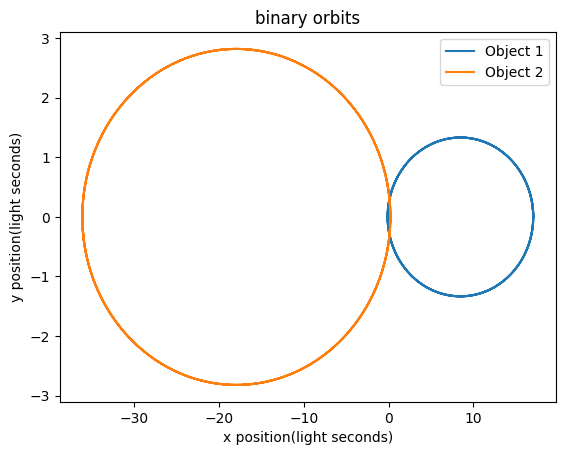

In [21]:
t_vals = pure_ellipse_forces.t
x1 = pure_ellipse_forces.y[0]
y1 = pure_ellipse_forces.y[1]
x2 = pure_ellipse_forces.y[2]
y2 = pure_ellipse_forces.y[3]
x1_dot = pure_ellipse_forces.y[4]
y1_dot = pure_ellipse_forces.y[5]
x2_dot = pure_ellipse_forces.y[6]
y2_dot = pure_ellipse_forces.y[7]

plt.title("binary orbits")
plt.xlabel("x position(light seconds)")
plt.ylabel("y position(light seconds)")
plt.plot(x1,y1, label = 'Object 1')
plt.plot(x2,y2, label = 'Object 2')
plt.legend()


In [11]:
def elipse_with_dark_matter(t,y,m1,m2,G,dark_matter_density):
    x1,y1,x2,y2,vx1,vy1,vx2,vy2 = y

    return [
        vx1, #x1-dot = vx1
        vy1, #y1-dot = vy1
        vx2, #x2-dot = vx2
        vy2, #y2-dot = vy2
        -G*(m1+m2)*x1 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2) - 4*np.pi*G*dark_matter_density*x1/3, #x1-doubled-dot =
        -G*(m1+m2)*y1 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2) - 4*np.pi*G*dark_matter_density*y1/3, #y1-double-dot =
        -G*(m1+m2)*x2 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2) - 4*np.pi*G*dark_matter_density*x2/3,  #x2-double-dot =
        -G*(m1+m2)*y2 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2) - 4*np.pi*G*dark_matter_density*y2/3   #y2-double-dot =
    ]

r1 = semi_major_axis*(1+eccentricity)
r2 = m1/m2 * r1
theta_dot = (1-eccentricity)/(semi_major_axis*eccentricity*(1+eccentricity))
y0=[
    r1, #x1
    0, #y1
    -r2, #x2
    0, #y2
    0, #x1-dot
    r1*theta_dot, #y1-dot
    0, #x2-dot
    -r2*theta_dot #y2-dot
    ]

pure_ellipse_forces_with_dark_matter = solve_ivp(elipse_with_dark_matter,[0,80],y0,method='RK45',max_step=0.000005,args=(m1,m2,grav,dark_matter_density))



/home/mitch/miniconda3/envs/scicomp/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/mitch/miniconda3/envs/scicomp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


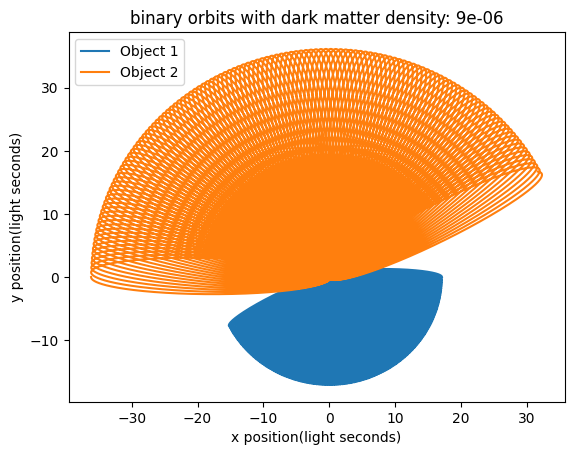

In [12]:
t_vals_dm = pure_ellipse_forces_with_dark_matter.t
x1_dm = pure_ellipse_forces_with_dark_matter.y[0]
y1_dm = pure_ellipse_forces_with_dark_matter.y[1]
x2_dm = pure_ellipse_forces_with_dark_matter.y[2]
y2_dm = pure_ellipse_forces_with_dark_matter.y[3]
x1_dot_dm = pure_ellipse_forces_with_dark_matter.y[4]
y1_dot_dm = pure_ellipse_forces_with_dark_matter.y[5]
x2_dot_dm = pure_ellipse_forces_with_dark_matter.y[6]
y2_dot_dm = pure_ellipse_forces_with_dark_matter.y[7]

plt.title("binary orbits with dark matter density: " + str(dark_matter_density))
plt.xlabel("x position(light seconds)")
plt.ylabel("y position(light seconds)")
plt.plot(x1_dm,y1_dm, label = 'Object 1')
plt.plot(x2_dm,y2_dm, label = 'Object 2')
plt.legend()

In [13]:
#check constant center of mass
cm_values_x = (x1_dm * m1 + x2_dm * m2)/(m1+m2)
cm_values_y = (y1_dm * m1 + y2_dm * m2)/(m1+m2)
print("x cm difference avg: " + str(np.average(np.sqrt(   np.pow(cm_values_x,2)   ))))

print("y cm difference avg: " + str(np.average(np.sqrt(   np.pow(cm_values_y,2)   ))))


x cm difference avg: 3.07097628011885e-12
y cm difference avg: 3.4921948755225276e-12
